<a href="https://colab.research.google.com/github/raymec/keras/blob/main/Project_2_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spring 2022
# CPSC 585 Project 2
## Raymond Carpio
## Yu Pan
## Sijie Shang
## John Tu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from dataset import * # Import the entire dataset
import random # Needed to generate random numbers
import numpy as np # Needed to do NumPy functions
from matplotlib import pyplot as plt # Needed to do matplotlib graphs

print("TRAINING_SET: ", TRAINING_SET[0])
print("TEST_SET: ", TEST_SET[0])
print("MESSAGE: ", MESSAGE[0])

TRAINING_SET:  ('A', [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
TEST_SET:  ('A', [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

# 1. As with Project 1, convert the images in TRAINING_SET, TEST_SET, and MESSAGE into two-dimensional NumPy arrays of size (# examples × # features).

In [ ]:
def show(image):
    letter_len = len(image)
    counter = 0
    for x in range(letter_len):
        if image[x] == 1:
            print('#', end='')
        else:
            print(' ', end='')
        counter += 1
        if counter == 16:
            counter = 0
            print('\n', end='')

In [ ]:
def convert_2d_array(input_data):
    if len(input_data) == 0:
        return None
    output_data = []
    if len(input_data[0]) == 2:
        for x, y in input_data:
            output_data.append(np.array(y))
    else:
        for x in input_data:
            output_data.append(np.array(x))
    return np.array(output_data)

def letter_list(input_data):
    if len(input_data) == 0:
        return None
    output_data = []
    if len(input_data[0]) == 2:
        for x, y in input_data:
            output_data.append(np.array(x))
    return np.array(output_data)

TRAINING_SET_2D = convert_2d_array(TRAINING_SET)
TEST_SET_2D = convert_2d_array(TEST_SET)
MESSAGE_2D = convert_2d_array(MESSAGE)

# Verify that each 2-dimensional NumPy array contains the same number of elements from the original arrays.
print(TRAINING_SET_2D.shape)
print(TEST_SET_2D.shape)
print(MESSAGE_2D.shape)

print("\nThe image of the first letter: \n")
show(TRAINING_SET_2D[0])

letter_list_train=letter_list(TRAINING_SET)
letter_list_test=letter_list(TEST_SET)
print('The letter list: ',letter_list)


(52, 256)
(26, 256)
(31, 256)

The image of the first letter: 

    ####        
    ####        
  ########      
  ########      
####    ####    
####    ####    
####    ####    
####    ####    
############    
############    
####    ####    
####    ####    
####    ####    
####    ####    
                
                
The letter list:  <function letter_list at 0x7f4c0d008560>


# 2. Rather than training 26 different perceptrons as you did in Project 1, this time you will use a single network with 26 possible outputs.
# In order to use the character labels in TRAINING_SET and TEST_SET, convert them into integer class vectors using ord(), then into 26 one-hot encoded categorical features.

In [ ]:
import tensorflow as tf

In [ ]:
unicode_letters_train, unicode_letters_test = [], []
for i in letter_list_train:
  unicode_char=ord(i)-ord('A')
  unicode_letters_train.append(unicode_char)

print(unicode_letters_train)

unicode_cat_train = tf.keras.utils.to_categorical(unicode_letters_train, num_classes=None, dtype="float32")

unicode_cat_train

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
for i in letter_list_test:
  unicode_char=ord(i)-ord('A')
  unicode_letters_test.append(unicode_char)

print(unicode_letters_test)

unicode_cat_test = tf.keras.utils.to_categorical(unicode_letters_test, num_classes=None, dtype="float32")

unicode_cat_test

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 

# 3. Create a Sequential Keras model with a Dense hidden layer and a Dense output layer with softmax activation and categorical cross-entropy loss.

In [ ]:
# Create a sequential model with two Dense layers:
# One as a hidden layer and the other as an output layer
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(256,)))
model.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer"))
model.add(tf.keras.layers.Dense(26, activation=tf.keras.activations.softmax, name="Output_layer"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer (Dense)        (None, 32)                8224      
                                                                 
 Output_layer (Dense)        (None, 26)                858       
                                                                 
Total params: 9,082
Trainable params: 9,082
Non-trainable params: 0
_________________________________________________________________


# 4. compile and fit the model to the training set. Train the model until the accuracy is as high as possible. You may wish to use an EarlyStopping callback.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor="categorical_accuracy", patience=50, restore_best_weights=False)
model.fit(x=TRAINING_SET_2D, y=unicode_cat_train, epochs=9999, verbose=2, callbacks=[callback])

Epoch 1/9999
2/2 - 1s - loss: 3.4786 - categorical_accuracy: 0.0000e+00 - 598ms/epoch - 299ms/step
Epoch 2/9999
2/2 - 0s - loss: 3.3693 - categorical_accuracy: 0.0192 - 12ms/epoch - 6ms/step
Epoch 3/9999
2/2 - 0s - loss: 3.2944 - categorical_accuracy: 0.0577 - 11ms/epoch - 5ms/step
Epoch 4/9999
2/2 - 0s - loss: 3.2298 - categorical_accuracy: 0.0577 - 8ms/epoch - 4ms/step
Epoch 5/9999
2/2 - 0s - loss: 3.1733 - categorical_accuracy: 0.0577 - 9ms/epoch - 4ms/step
Epoch 6/9999
2/2 - 0s - loss: 3.1238 - categorical_accuracy: 0.0962 - 11ms/epoch - 5ms/step
Epoch 7/9999
2/2 - 0s - loss: 3.0785 - categorical_accuracy: 0.1346 - 11ms/epoch - 6ms/step
Epoch 8/9999
2/2 - 0s - loss: 3.0344 - categorical_accuracy: 0.1346 - 9ms/epoch - 5ms/step
Epoch 9/9999
2/2 - 0s - loss: 2.9968 - categorical_accuracy: 0.1731 - 11ms/epoch - 5ms/step
Epoch 10/9999
2/2 - 0s - loss: 2.9534 - categorical_accuracy: 0.1923 - 9ms/epoch - 5ms/step
Epoch 11/9999
2/2 - 0s - loss: 2.9145 - categorical_accuracy: 0.1923 - 9ms/e

# 5. evaluate the model on TEST_SET. What accuracy do you obtain? If the accuracy is less than 100%, which test images are misclassified? (You may wish to use the show(image) function you defined in the previous project.)

In [ ]:
model.evaluate(x=TEST_SET_2D, y=unicode_cat_test, verbose=1)


1/1 [==============================] - 0s 166ms/step - loss: 2.0935 - categorical_accuracy: 0.3462


[2.0935325622558594, 0.3461538553237915]

In [ ]:
# predicted = model.predict(TEST_SET_2D)  
# result = np.absolute(unicode_cat_test-predicted)
# print(predicted)

In [ ]:
# Print out the actual and predicted letters from TEST_SET_2D.
# result_list = []
# for num in range(len(predicted)):
#     max_val = 0
#     actual = chr(num+ord('A'))
#     max_val = predicted[num].argmax() # Return the index that contains the largest value.
#     predict = chr(int(max_val)+ord('A'))
#     result_list.append([actual, predict])
# result_list

In [ ]:
# Verify the accuracy obtained for evaluate().
# list_misclassified = []
# num_total, num_correct = 26, 26
# for i in range(len(result_list)):
#     if result_list[i][0] != result_list[i][1]:
#         num_correct -= 1
#         list_misclassified.append([result_list[i][0], result_list[i][1]])
# print("Number of images correctly classified: {}%".format((num_correct/num_total)*100))
# if len(list_misclassified) == 0:
#     print("All test images are classified correctly.")
# else:
#     print("Here are the list of test images that are misclassified and how they appear:")
#     print("Actual    Predicted")
#     for i in range(len(list_misclassified)):
#         print("{}         {}".format(list_misclassified[i][0], list_misclassified[i][1]))

In [ ]:
# Predict how the message will appear via Keras Sequential model.
predicted_message = model.predict(MESSAGE_2D)
predicted_message

In [ ]:
message_list = ""
for num in range(len(predicted_message)):
    max_val = 0
    max_val = predicted_message[num].argmax() # Return the index that contains the largest value.
    predict = chr(int(max_val)+ord('A'))
    message_list += predict
print(message_list)

JNEFIVEBOYINGWIYAPDSJUMPQUICKLY


In [ ]:
actual_message = "THEFIVEBOXINGWIZARDSJUMPQUICKLY"
list_mismatch = []
num_total, num_correct = len(actual_message), len(message_list)
for i in range(len(actual_message)):
    if message_list[i] != actual_message[i]:
        num_correct -= 1
        list_mismatch.append([actual_message[i], message_list[i]])
print("Accuracy between predicted and actual message: {}%".format((num_correct/num_total)*100))
if len(list_mismatch) == 0:
    print("The message appears to be decoded correctly.")
else:
    print("Here is the list of letters that are a mismatch between predicted and actual message:")
    print("Actual    Predicted")
    for i in range(len(list_mismatch)):
        print("{}         {}".format(list_mismatch[i][0], list_mismatch[i][1]))

Accuracy between predicted and actual message: 83.87096774193549%
Here is the list of letters that are a mismatch between predicted and actual message:
Actual    Predicted
T         J
H         N
X         Y
Z         Y
R         P


# 6. How does this model compare with the performance of your perceptron models in Project 1?

## A: The prediction accuracy of the Keras Sequential model for MESSAGE is 83.87%, which is higher than the 76-77% prediction accuracy for MESSAGE of the perceptron models in Project 1. This difference is most likely due to the hidden layers in the Keras Sequential model.

# 7. All of the letters in MESSAGE were likely not decoded correctly, so let’s try to improve the performance of the model by adding additional hidden layers. Add two additional hidden layers of the same size as your original hidden layer, then repeat experiments (4) and (5).

In [ ]:
print(MESSAGE_2D.shape)
show(MESSAGE_2D[0])
print(MESSAGE)
message_list=['']

(31, 256)
  ##############
  ############# 
  ##    ##    ##
  ##    ##    ##
        ##      
        ##      
        ##      
        ##      
        ##      
   #    ##    # 
        ##      
        ##      
      ######    
      ######    
  #             
                
[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Do experiments 4 and 5 again, but this time, add two more hidden layers.
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.Input(shape=(256,)))
model2.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer1"))
model2.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer2"))
model2.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer3"))
model2.add(tf.keras.layers.Dense(26, activation=tf.keras.activations.softmax, name="Output_layer"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, 32)                8224      
                                                                 
 Hidden_layer2 (Dense)       (None, 32)                1056      
                                                                 
 Hidden_layer3 (Dense)       (None, 32)                1056      
                                                                 
 Output_layer (Dense)        (None, 26)                858       
                                                                 
Total params: 11,194
Trainable params: 11,194
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=[tf.keras.metrics.CategoricalAccuracy()])
callback = tf.keras.callbacks.EarlyStopping(monitor="categorical_accuracy", patience=50, restore_best_weights=False)
model2.fit(x=TRAINING_SET_2D, y=unicode_cat_train, epochs=9999, verbose=2, callbacks=[callback])

Epoch 1/9999
2/2 - 0s - loss: 3.2565 - categorical_accuracy: 0.0385 - 421ms/epoch - 211ms/step
Epoch 2/9999
2/2 - 0s - loss: 3.2149 - categorical_accuracy: 0.0385 - 11ms/epoch - 6ms/step
Epoch 3/9999
2/2 - 0s - loss: 3.1891 - categorical_accuracy: 0.0577 - 10ms/epoch - 5ms/step
Epoch 4/9999
2/2 - 0s - loss: 3.1644 - categorical_accuracy: 0.0962 - 8ms/epoch - 4ms/step
Epoch 5/9999
2/2 - 0s - loss: 3.1414 - categorical_accuracy: 0.0962 - 11ms/epoch - 6ms/step
Epoch 6/9999
2/2 - 0s - loss: 3.1196 - categorical_accuracy: 0.0962 - 12ms/epoch - 6ms/step
Epoch 7/9999
2/2 - 0s - loss: 3.0938 - categorical_accuracy: 0.1154 - 9ms/epoch - 5ms/step
Epoch 8/9999
2/2 - 0s - loss: 3.0704 - categorical_accuracy: 0.1154 - 11ms/epoch - 5ms/step
Epoch 9/9999
2/2 - 0s - loss: 3.0411 - categorical_accuracy: 0.1154 - 11ms/epoch - 5ms/step
Epoch 10/9999
2/2 - 0s - loss: 3.0116 - categorical_accuracy: 0.1154 - 12ms/epoch - 6ms/step
Epoch 11/9999
2/2 - 0s - loss: 2.9833 - categorical_accuracy: 0.1154 - 9ms/epo

In [ ]:
model2.evaluate(x=TEST_SET_2D, y=unicode_cat_test, verbose=1)

1/1 [==============================] - 0s 144ms/step - loss: 1.9257 - categorical_accuracy: 0.2692


[1.9257231950759888, 0.26923078298568726]

In [ ]:
predicted = model2.predict(TEST_SET_2D)
predicted

array([[1.74328879e-01, 1.08230993e-01, 3.35816965e-02, 3.22828032e-02,
        2.25764583e-03, 1.16446063e-04, 3.82236600e-01, 3.30166891e-03,
        1.41470300e-04, 3.41673219e-03, 1.94447599e-02, 6.54316787e-03,
        2.55936738e-02, 2.01947708e-03, 1.01850706e-03, 1.29716219e-02,
        7.83534255e-03, 1.51872680e-01, 2.06301436e-02, 4.04240651e-04,
        6.71990355e-03, 3.35945151e-06, 2.79491884e-03, 4.25604550e-04,
        1.45111640e-03, 3.76536540e-04],
       [9.20074126e-06, 6.94263816e-01, 2.17229481e-05, 3.93267925e-04,
        1.04438692e-01, 9.65028908e-03, 1.04687130e-03, 7.06139281e-06,
        2.96923593e-02, 1.43607031e-03, 2.33983435e-03, 6.27885631e-04,
        2.14824118e-04, 7.57547969e-06, 5.25303108e-07, 1.87177826e-02,
        5.47645527e-07, 6.35323301e-02, 2.70058610e-03, 6.88387975e-02,
        2.99506046e-05, 4.94526475e-10, 1.14797345e-07, 2.23279305e-04,
        4.07957414e-04, 1.39861880e-03],
       [1.38646038e-03, 1.27450421e-01, 2.10709721e-01

In [ ]:
result_list = []
for num in range(len(predicted)):
    max_val = 0
    actual = chr(num+ord('A'))
    max_val = predicted[num].argmax() # Return the index that contains the largest value.
    predict = chr(int(max_val)+ord('A'))
    result_list.append([actual, predict])
result_list

[['A', 'G'],
 ['B', 'B'],
 ['C', 'S'],
 ['D', 'S'],
 ['E', 'E'],
 ['F', 'I'],
 ['G', 'G'],
 ['H', 'R'],
 ['I', 'T'],
 ['J', 'Z'],
 ['K', 'K'],
 ['L', 'E'],
 ['M', 'K'],
 ['N', 'G'],
 ['O', 'D'],
 ['P', 'P'],
 ['Q', 'Q'],
 ['R', 'B'],
 ['S', 'E'],
 ['T', 'E'],
 ['U', 'G'],
 ['V', 'U'],
 ['W', 'U'],
 ['X', 'M'],
 ['Y', 'N'],
 ['Z', 'Z']]

In [ ]:
list_misclassified = []
num_total, num_correct = 26, 26
for i in range(len(result_list)):
    if result_list[i][0] != result_list[i][1]:
        num_correct -= 1
        list_misclassified.append([result_list[i][0], result_list[i][1]])
print("Number of images correctly classified: {}%".format((num_correct/num_total)*100))
if len(list_misclassified) == 0:
    print("All test images are classified correctly.")
else:
    print("Here are the list of test images that are misclassified and how they appear:")
    print("Actual    Predicted")
    for i in range(len(list_misclassified)):
        print("{}         {}".format(list_misclassified[i][0], list_misclassified[i][1]))

Number of images correctly classified: 26.923076923076923%
Here are the list of test images that are misclassified and how they appear:
Actual    Predicted
A         G
C         S
D         S
F         I
H         R
I         T
J         Z
L         E
M         K
N         G
O         D
R         B
S         E
T         E
U         G
V         U
W         U
X         M
Y         N


In [ ]:
predicted_message = model2.predict(MESSAGE_2D)
predicted_message

array([[5.32964862e-07, 5.46984433e-04, 1.34330767e-04, 9.78852549e-05,
        6.79163933e-01, 2.53497604e-02, 3.61135253e-03, 1.16375821e-04,
        4.99108285e-02, 1.50684980e-04, 2.79634865e-03, 2.57091178e-03,
        4.42598131e-04, 7.56716759e-07, 7.64838751e-06, 1.38629242e-04,
        3.57642733e-07, 7.77950409e-05, 9.20580979e-03, 1.84192076e-01,
        2.09142730e-04, 5.18309150e-07, 1.34443789e-08, 4.88214940e-03,
        9.50539578e-03, 2.68871337e-02],
       [1.44140184e-01, 6.14012405e-02, 1.03570672e-03, 6.57485425e-02,
        2.35983985e-04, 2.30439167e-04, 3.35479006e-02, 4.82885502e-02,
        6.15712815e-06, 3.08892049e-04, 1.15908295e-01, 4.88253497e-03,
        4.34701294e-02, 1.18726585e-02, 4.16290626e-04, 5.43130338e-02,
        1.25863608e-02, 3.61014873e-01, 1.17513491e-03, 1.10683650e-04,
        1.04438758e-03, 1.53935543e-04, 2.99236961e-02, 4.60035680e-03,
        3.54144978e-03, 4.25394865e-05],
       [8.69653078e-08, 2.04188330e-03, 3.49302134e-08

In [ ]:
message_list = ""
for num in range(len(predicted_message)):
    max_val = 0
    max_val = predicted_message[num].argmax() # Return the index that contains the largest value.
    predict = chr(int(max_val)+ord('A'))
    message_list += predict
print(message_list)

EREFIVEBOMINGWIZABSSJUMPQUICKLY


In [ ]:
actual_message = "THEFIVEBOXINGWIZARDSJUMPQUICKLY"
list_mismatch = []
num_total, num_correct = len(actual_message), len(message_list)
for i in range(len(actual_message)):
    if message_list[i] != actual_message[i]:
        num_correct -= 1
        list_mismatch.append([actual_message[i], message_list[i]])
print("Accuracy between predicted and actual message: {}%".format((num_correct/num_total)*100))
if len(list_mismatch) == 0:
    print("The message appears to be decoded correctly.")
else:
    print("Here is the list of letters that are a mismatch between predicted and actual message:")
    print("Actual    Predicted")
    for i in range(len(list_mismatch)):
        print("{}         {}".format(list_mismatch[i][0], list_mismatch[i][1]))

Accuracy between predicted and actual message: 83.87096774193549%
Here is the list of letters that are a mismatch between predicted and actual message:
Actual    Predicted
T         E
H         R
X         M
R         B
D         S


# Does the performance improve?

## A: No, the performance does not improve simply by adding more hidden layers.

# 8. Repeat experiment (7), adding additional layers of the same size until the message is decoded correctly. What results do you observe?

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.Input(shape=(256,)))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer1"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer2"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer3"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer4"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer5"))
model3.add(tf.keras.layers.Dense(26, activation=tf.keras.activations.softmax, name="Output_layer"))

model3.summary()
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=[tf.keras.metrics.CategoricalAccuracy()])
callback = tf.keras.callbacks.EarlyStopping(monitor="categorical_accuracy", patience=50, restore_best_weights=False)
model3.fit(x=TRAINING_SET_2D, y=unicode_cat_train, epochs=9999, verbose=2, callbacks=[callback])
model3.evaluate(x=TEST_SET_2D, y=unicode_cat_test, verbose=1)


In [ ]:
predicted = model3.predict(TEST_SET_2D)
predicted

In [ ]:
result_list = []
for num in range(len(predicted)):
    max_val = 0
    actual = chr(num+ord('A'))
    max_val = predicted[num].argmax() # Return the index that contains the largest value.
    predict = chr(int(max_val)+ord('A'))
    result_list.append([actual, predict])
result_list

In [ ]:
list_misclassified = []
num_total, num_correct = 26, 26
for i in range(len(result_list)):
    if result_list[i][0] != result_list[i][1]:
        num_correct -= 1
        list_misclassified.append([result_list[i][0], result_list[i][1]])
print("Number of images correctly classified: {}%".format((num_correct/num_total)*100))
if len(list_misclassified) == 0:
    print("All test images are classified correctly.")
else:
    print("Here are the list of test images that are misclassified and how they appear:")
    print("Actual    Predicted")
    for i in range(len(list_misclassified)):
        print("{}         {}".format(list_misclassified[i][0], list_misclassified[i][1]))

Number of images correctly classified: 26.923076923076923%
Here are the list of test images that are misclassified and how they appear:
Actual    Predicted
A         B
B         E
C         J
G         S
H         W
I         T
K         Y
M         U
N         V
O         D
P         I
R         I
T         S
U         V
V         A
W         V
X         Y
Y         V
Z         E


In [ ]:
predicted_message = model3.predict(MESSAGE_2D)
predicted_message

In [ ]:
message_list = ""
for num in range(len(predicted_message)):
    max_val = 0
    max_val = predicted_message[num].argmax() # Return the index that contains the largest value.
    predict = chr(int(max_val)+ord('A'))
    message_list += predict
print(message_list)

EWEFIVKBOYINGWIEAIDSJUMPQUICKLY


In [ ]:
actual_message = "THEFIVEBOXINGWIZARDSJUMPQUICKLY"
list_mismatch = []
num_total, num_correct = len(actual_message), len(message_list)
for i in range(len(actual_message)):
    if message_list[i] != actual_message[i]:
        num_correct -= 1
        list_mismatch.append([actual_message[i], message_list[i]])
print("Accuracy between predicted and actual message: {}%".format((num_correct/num_total)*100))
if len(list_mismatch) == 0:
    print("The message appears to be decoded correctly.")
else:
    print("Here is the list of letters that are a mismatch between predicted and actual message:")
    print("Actual    Predicted")
    for i in range(len(list_mismatch)):
        print("{}         {}".format(list_mismatch[i][0], list_mismatch[i][1]))

Accuracy between predicted and actual message: 80.64516129032258%
Here is the list of letters that are a mismatch between predicted and actual message:
Actual    Predicted
T         E
H         W
E         K
X         Y
Z         E
R         I


## A: As more hidden layers are added, the categorical accuracy obtained will gradually worsen due to overfitting.

# 9. Load the EMNIST Letters dataset, and use plt.imshow() to verify that the image data has been loaded correctly and that the corresponding labels are correct.

In [ ]:
from matplotlib import pyplot as plt # Needed to do matplotlib operations
emnist_data = np.load('emnist_letters.npz')

train_img = emnist_data['train_images']
train_label = emnist_data['train_labels']

test_img = emnist_data['test_images']
test_label = emnist_data['test_labels']

validate_img = emnist_data['validate_images']
validate_label = emnist_data['validate_labels']


train_img = train_img.reshape((104000, 28, 28))
train_img = train_img.astype("float32") / 255
test_img = test_img.reshape((20800, 28, 28))
test_img = test_img.astype("float32") / 255
validate_img = validate_img.reshape((20800, 28, 28))
validate_img = validate_img.astype("float32") / 255

In [ ]:
print(emnist_data)
print("Train_img shape: ", train_img.shape)
print("Train_label shape: ", train_label.shape)
print("Test_img shape: ", test_img.shape)
print("Test_label shape: ", test_label.shape)
print("Validate_img shape: ", validate_img.shape)
print("Validate_label shape: ", validate_label.shape)

Train_img shape:  (104000, 28, 28)
Train_label shape:  (104000, 27)
Test_img shape:  (20800, 28, 28)
Test_label shape:  (20800, 27)
Validate_img shape:  (20800, 28, 28)
Validate_label shape:  (20800, 27)


Label of the image:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0.]


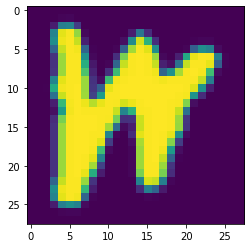

In [ ]:
# Print out the first 3 letters.
plt.imshow(train_img[0].reshape(28, 28))
print("Label of the image: ",train_label[0])

In [ ]:
print(chr(np.argmax(train_label[0])-1+ord('A')))

W


Label of the image:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


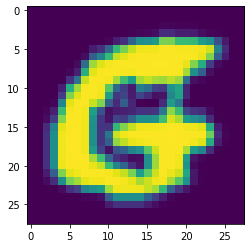

In [ ]:
plt.imshow(train_img[1].reshape(28, 28))
print("Label of the image: ",train_label[1])

In [ ]:
print(chr(np.argmax(train_label[1])-1+ord('A')))

G


Label of the image:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


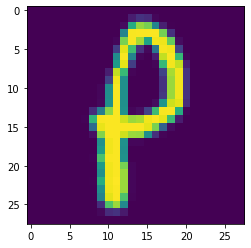

In [ ]:
plt.imshow(train_img[2].reshape(28, 28))
print("Label of the image: ",train_label[2])

In [ ]:
print(chr(np.argmax(train_label[2])-1+ord('A')))

P


#10.	Apply the network architecture from Chollet’s MNIST notebook to the EMNIST Letters data. (You will need to modify the numbers of inputs and outputs, but should leave the dense layer intact.) What accuracy do you achieve? How does this compare with the accuracy for MNIST?

In [ ]:
new_train_label = []

for i in range(len(train_label)):
  num_letter = 0
  for j in range(len(train_label[0])):
    if train_label[i][j]==0:
      num_letter+=1
    else:
      new_train_label.append(num_letter)


In [ ]:
new_train_label=np.array(new_train_label)
print(new_train_label)


[23  7 16 ... 21 23 25]


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(27, activation="softmax")
])

In [ ]:
# from keras.utils import np_utils


# print("Train_label shape: ", train_label.shape)
# print("Train_label shape: ", train_img.shape)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_img, train_label, epochs=5, batch_size=128)

Epoch 1/5
813/813 [==============================] - 9s 10ms/step - loss: 2.3251 - accuracy: 0.4256
Epoch 2/5
813/813 [==============================] - 8s 10ms/step - loss: 1.4017 - accuracy: 0.5980
Epoch 3/5
813/813 [==============================] - 8s 10ms/step - loss: 1.2061 - accuracy: 0.6482
Epoch 4/5
813/813 [==============================] - 8s 10ms/step - loss: 1.1213 - accuracy: 0.6714
Epoch 5/5
813/813 [==============================] - 8s 10ms/step - loss: 1.0645 - accuracy: 0.6895


In [ ]:
model.evaluate(test_img, test_label, verbose=1)

650/650 [==============================] - 2s 2ms/step - loss: 1.0503 - accuracy: 0.6961


[1.0503337383270264, 0.6961057782173157]

## A: The accuracy we obtained for the EMNIST Letters data was 69.1%, which is lower than the 98.89% accuracy that Chollet's notebook obtained for the MNIST data.

MNIST accuracy from Chollet's notebook

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2580 - accuracy: 0.9250

Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1030 - accuracy: 0.9697

Epoch 3/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0673 - accuracy: 0.9805

Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0487 - accuracy: 0.9857

Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0373 - accuracy: 0.9889

<keras.callbacks.History at 0x7f0e79b5ec90>

# 11.	Keeping the same number of layers in the network (i.e. an MLP with a single hidden layer), modify the architecture to improve the accuracy. You will need to decide on an appropriate number of neurons in the hidden layer. Keep in mind that:

>a.	There are 27 classes rather than 10, so you will need a larger hidden layer than the MNIST network.

>b.	In addition to having more classes, EMNIST Letters mixes upper- and lowercase letters within each class, so even with enough neurons in the hidden layer, your accuracy is likely to be lower.  See the details in the EMNIST paper for the kind of performance you might reasonably expect.

>c.	The Keras fit() method can take a validation_data parameter in order to evaluate metrics on the validation set.


In [ ]:
model2 = keras.Sequential([
    layers.Flatten(),
    layers.Dense(1024, activation="relu"),     #doubled the dense layer 512 (acc:69%)->1024 (acc:71%)
    layers.Dense(27, activation="softmax")
])

In [ ]:
model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model2.fit(train_img, train_label, validation_data=(validate_img, validate_label), epochs=5, batch_size=128)

Epoch 1/5
813/813 [==============================] - 16s 19ms/step - loss: 2.0947 - accuracy: 0.4636 - val_loss: 1.4247 - val_accuracy: 0.5965
Epoch 2/5
813/813 [==============================] - 15s 19ms/step - loss: 1.2749 - accuracy: 0.6303 - val_loss: 1.1770 - val_accuracy: 0.6613
Epoch 3/5
813/813 [==============================] - 15s 19ms/step - loss: 1.1246 - accuracy: 0.6715 - val_loss: 1.0820 - val_accuracy: 0.6891
Epoch 4/5
813/813 [==============================] - 15s 18ms/step - loss: 1.0426 - accuracy: 0.6959 - val_loss: 1.0123 - val_accuracy: 0.7099
Epoch 5/5
813/813 [==============================] - 15s 18ms/step - loss: 0.9698 - accuracy: 0.7184 - val_loss: 0.9362 - val_accuracy: 0.7325


In [ ]:
model2.evaluate(test_img, test_label, verbose=1)

650/650 [==============================] - 3s 4ms/step - loss: 0.9436 - accuracy: 0.7295


[0.9435973167419434, 0.729519248008728]

## The accuracy is 72.95%, which is a slight improvement over the accuracy from the previous problem.

# 12. The Keras examples include a Simple MNIST convnet. Note the accuracy obtained by that code compared to the previous example from Chollet.
# Rather than building a deeper MLP, let’s apply this architecture to the EMNIST Letters data. What accuracy do you achieve? How does this compare with the accuracy for the MNIST dataset?


In [ ]:
num_classes = 27
input_shape = (28, 28, 1)

train_img = train_img.reshape(104000, 28, 28)
test_img = test_img.reshape(20800, 28, 28)

train_img_convnet = np.expand_dims(train_img, -1)
test_img_convnet = np.expand_dims(test_img, -1)

#check
print(train_img_convnet.shape)
print(train_img_convnet[0].shape)
print(test_img_convnet.shape)
print(test_img_convnet[0].shape)

(104000, 28, 28, 1)
(28, 28, 1)
(20800, 28, 28, 1)
(28, 28, 1)


In [ ]:
#convert class vectors to binary class matrices
# train_label_convnet = keras.utils.to_categorical(train_label, num_classes)
# test_label_convnet = keras.utils.to_categorical(test_label, num_classes)

In [ ]:
model3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [ ]:
model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model3.fit(train_img_convnet, train_label, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
732/732 [==============================] - 68s 93ms/step - loss: 2.2642 - accuracy: 0.3525 - val_loss: 1.3210 - val_accuracy: 0.6098
Epoch 2/5
732/732 [==============================] - 68s 93ms/step - loss: 1.3585 - accuracy: 0.5948 - val_loss: 1.1193 - val_accuracy: 0.6706
Epoch 3/5
732/732 [==============================] - 69s 94ms/step - loss: 1.1531 - accuracy: 0.6527 - val_loss: 0.9162 - val_accuracy: 0.7320
Epoch 4/5
732/732 [==============================] - 69s 94ms/step - loss: 0.9567 - accuracy: 0.7133 - val_loss: 0.7377 - val_accuracy: 0.7817
Epoch 5/5
732/732 [==============================] - 69s 94ms/step - loss: 0.8232 - accuracy: 0.7528 - val_loss: 0.6325 - val_accuracy: 0.8069


In [ ]:
model3.evaluate(test_img_convnet, test_label, verbose=1)

650/650 [==============================] - 6s 9ms/step - loss: 0.6282 - accuracy: 0.8149


[0.6282038688659668, 0.8149038553237915]

## The accuracy obtained is 81.49%, which is not better than the accuracy for MNIST, despite significant improvements over the previous models.

# 13. Use plt.imshow() to view some of the misclassified images and examine their labels. Describe what you think might have gone wrong.

In [ ]:
# Only plt.imshow() will be used to view the misclassified images.
misclassified_images = []
for i in range(200):
    predict_image = model.predict(test_img[i].reshape(1, 28*28))
    predict_letter = chr(np.argmax(predict_image)-1+ord('A'))
    actual_letter = chr(np.argmax(test_label[i])-1+ord('A'))
    if predict_letter != actual_letter:
        misclassified_images.append(i)
print("List of images that appears to be misclassified:")
print(misclassified_images)

List of images that appears to be misclassified:
[0, 1, 3, 4, 8, 10, 12, 13, 14, 16, 18, 19, 21, 22, 27, 32, 33, 34, 36, 37, 41, 44, 45, 47, 48, 51, 52, 56, 57, 58, 59, 68, 69, 76, 78, 80, 83, 84, 88, 90, 91, 94, 95, 96, 98, 103, 104, 106, 108, 111, 112, 117, 118, 119, 121, 123, 127, 128, 129, 131, 132, 136, 137, 138, 139, 142, 143, 144, 145, 147, 149, 151, 152, 157, 159, 160, 161, 164, 166, 169, 170, 173, 176, 178, 179, 180, 184, 185, 186, 187, 190, 191, 192]


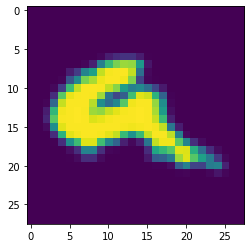

In [ ]:
plt.imshow(test_img[misclassified_images[0]].reshape(28, 28))

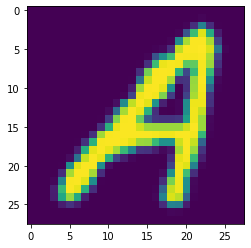

In [ ]:
plt.imshow(test_img[misclassified_images[1]].reshape(28, 28))

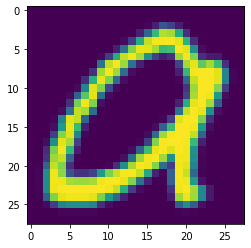

In [ ]:
plt.imshow(test_img[misclassified_images[2]].reshape(28, 28))

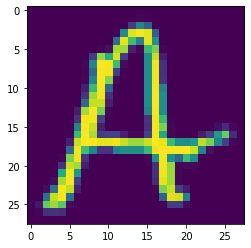

In [ ]:
plt.imshow(test_img[misclassified_images[3]].reshape(28, 28))

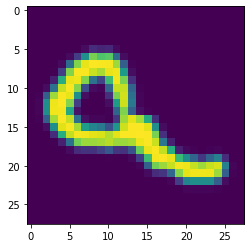

In [ ]:
plt.imshow(test_img[misclassified_images[4]].reshape(28, 28))

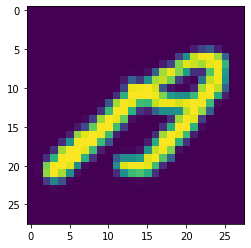

In [ ]:
plt.imshow(test_img[misclassified_images[5]].reshape(28, 28))

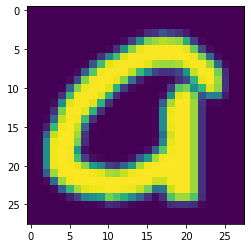

In [ ]:
plt.imshow(test_img[misclassified_images[6]].reshape(28, 28))

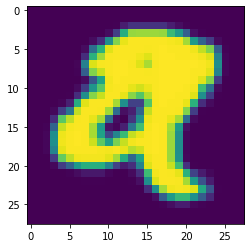

In [ ]:
plt.imshow(test_img[misclassified_images[7]].reshape(28, 28))

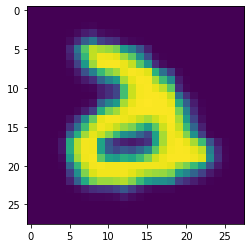

In [ ]:
plt.imshow(test_img[misclassified_images[-1]].reshape(28, 28))

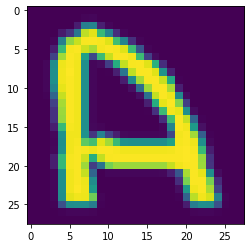

In [ ]:
plt.imshow(test_img[misclassified_images[-2]].reshape(28, 28))

## A: Although the letters are the same in both the images and the labels, the images does not necessarily match the ones from the labels. It is as if the letters are being written in a different manner.